In [105]:
import numpy as np
import pywt
from scipy import signal
from biosppy.signals import ecg

%matplotlib inline
import matplotlib.pyplot as plt


In [106]:
dispTime = 5
fs = 360

In [107]:
ch = 1


In [108]:
data = np.loadtxt('mit_arrythmia/100.txt',dtype = int)[:,ch]
print "Loaded ECG Signal CH #",ch
print "Samples Count : ", data.shape[0]
print "File Loaded"

Loaded ECG Signal CH # 1
Samples Count :  650000
File Loaded


In [109]:
time = np.linspace(0,1.* data.shape[0] / fs, data.shape[0])
print time.shape[0]

650000


In [110]:
def displayEcgSignal2(t,sig,title):
    
    plt.figure( figsize = (16,3))
    plt.plot(t,sig)
    
    ymin = np.amin(sig, axis = 0)
    ymax = np.amax(sig, axis = 0)
    
    plt.ylim(ymin - 20 ,ymax + 20)
    plt.grid()
    plt.title(title)
   
    line = np.zeros(int(t.shape[0]))
    plt.plot(t,line,'r')
    plt.show()
    

In [111]:
def sGolayFilter(sig):
    k = 3
    f = 1201
    trend = signal.savgol_filter(sig,f,k)
    fSig = sig - trend
    return fSig

In [112]:
def movingAverageFilter(sig, length):
    b = np.ones(length) * ( 1. * 1/length)
    a = 1
    fSig = signal.lfilter(b, a, sig)
    return fSig

In [125]:
winSec = 1200;
#ecgSignal = data[(time >=0) & (time<= winSec)]
ecgSignal = data
#t = time[0:ecgSignal.shape[0]:1]
t = time
print "ECG Signal Subset done"

ECG Signal Subset done


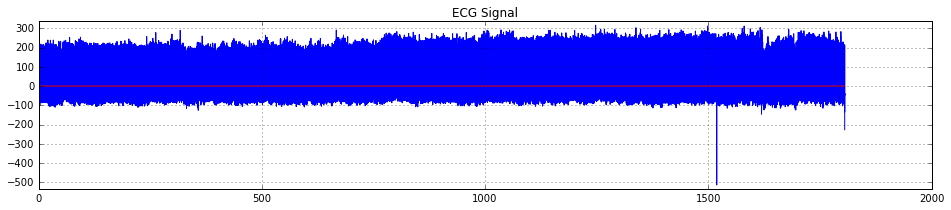

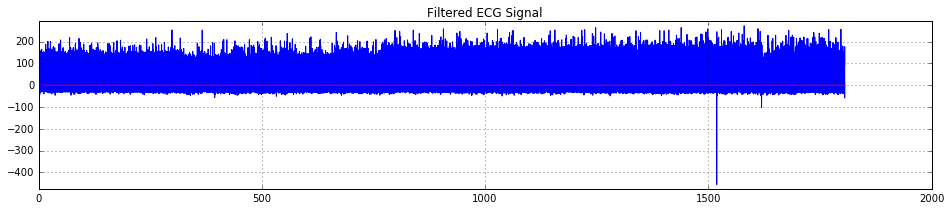

In [133]:

ecgSignal = ecgSignal - ecgSignal[0]
displayEcgSignal2(t,ecgSignal,"ECG Signal")

fEcgSignal = movingAverageFilter(ecgSignal, 10)

fEcgSignal = sGolayFilter(fEcgSignal)
displayEcgSignal2(t,fEcgSignal,"Filtered ECG Signal")

ecgSignalInt = ecgSignal

In [137]:

result = ecg.ecg(signal = ecgSignalInt, sampling_rate= 360.0, show = False  )
rpeaks =  result['rpeaks']
print rpeaks[0:200:1]
print "Peaks Found: ",len(rpeaks)


[   77   370   662   947  1231  1515  1809  2044  2403  2706  2997  3282
  3559  3862  4170  4466  4764  5060  5346  5634  5918  6214  6527  6823
  7106  7392  7669  7953  8246  8539  8837  9141  9432  9710  9998 10282
 10591 10894 11191 11480 11781 12066 12350 12645 12950 13266 13562 13842
 14131 14422 14710 15011 15310 15607 15899 16183 16465 16755 17058 17358
 17657 17947 18227 18514 18796 19080 19388 19693 19989 20271 20554 20837
 21131 21423 21729 22029 22321 22603 22881 23164 23454 23756 24053 24345
 24625 24913 25197 25485 25780 26088 26386 26670 26952 27237 27536 27833
 28132 28431 28726 29015 29294 29580 29873 30182 30487 30779 31065 31348
 31636 31928 32224 32530 32836 33127 33403 33691 33980 34274 34575 34870
 35168 35455 35736 36016 36310 36605 36916 37215 37499 37782 38071 38356
 38651 38950 39252 39548 39825 40096 40382 40677 40970 41272 41567 41849
 42117 42416 42698 42996 43307 43604 43892 44172 44456 44743 45030 45323
 45628 45924 46204 46479 46759 47037 47334 47632 47

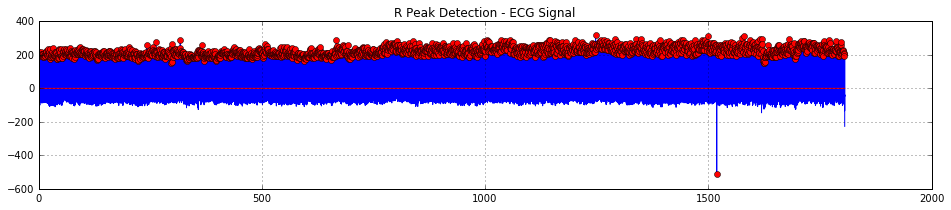

In [135]:
plt.figure(figsize = (16,3))
plt.plot(t,ecgSignalInt)
line = np.zeros(int(t.shape[0]))
plt.plot(t,line,'r')
plt.grid()
plt.title("R Peak Detection - ECG Signal")
plt.plot(t[rpeaks], ecgSignalInt[rpeaks], "ro")
plt.show()


In [136]:
RRInterval = np.diff(rpeaks)
print RRInterval[0:200:1]
print len(RRInterval)


[293 292 285 284 284 294 235 359 303 291 285 277 303 308 296 298 296 286
 288 284 296 313 296 283 286 277 284 293 293 298 304 291 278 288 284 309
 303 297 289 301 285 284 295 305 316 296 280 289 291 288 301 299 297 292
 284 282 290 303 300 299 290 280 287 282 284 308 305 296 282 283 283 294
 292 306 300 292 282 278 283 290 302 297 292 280 288 284 288 295 308 298
 284 282 285 299 297 299 299 295 289 279 286 293 309 305 292 286 283 288
 292 296 306 306 291 276 288 289 294 301 295 298 287 281 280 294 295 311
 299 284 283 289 285 295 299 302 296 277 271 286 295 293 302 295 282 268
 299 282 298 311 297 288 280 284 287 287 293 305 296 280 275 280 278 297
 298 288 282 284 279 275 283 295 305 291 277 280 285 283 287 295 295 290
 278 279 278 290 292 296 288 277 280 279 282 283 299 295 283 270 278 282
 285 292]
2271
